## NLP Project - SemEval2023 Task 3 subtask 1 - Detecting the category in online news in a multi-lingual setup

##### Import libraries

In [ ]:
from st1 import make_dataframe
import helper_functions as hf 
import pandas as pd

## Language - English

### Part 1 - Analyze and process data

#### Analyze data

##### Load data

In [31]:
train_folder = "data/en/train-articles-subtask-1/"
train_labels = "data/en/train-labels-subtask-1.txt"

test_folder = "data/en/dev-articles-subtask-1/"

In [32]:
df_train = make_dataframe(train_folder, train_labels)
df_test = make_dataframe(test_folder, labels_folder = None)

433it [00:00, 6985.24it/s]
83it [00:00, 6919.37it/s]


In [33]:
df_train.head()

,text,type
id,,
833042063,Chelsea Handler Admits She’s ‘Very Sexually At...,satire
832959523,How Theresa May Botched\n\nThose were the time...,satire
833039623,Robert Mueller III Rests His Case—Dems NEVER W...,satire
833032367,Robert Mueller Not Recommending Any More Indic...,satire
814777937,The Far Right Is Trying to Co-opt the Yellow V...,satire


In [34]:
df_test.head()

,text
id,
813452859,EU Profits From Trading With UK While London L...
813494037,Sadiq Khan Slammed for Pro-EU 'Message of Supp...
813547724,Foreign Secretary Jeremy Hunt says the UK shou...
813552066,"You insult us, ambassador: Woody Johnson flagr..."
813601978,Big Apple joins in ringing in New Year after r...


##### check data characteristics

Total number of samples:
text    433
type    433
dtype: int64

class distribution:
type
opinion      382
reporting     41
satire        10
Name: type, dtype: int64

 class distribution in %:
type
opinion      0.88
reporting    0.09
satire       0.02
Name: type, dtype: float64


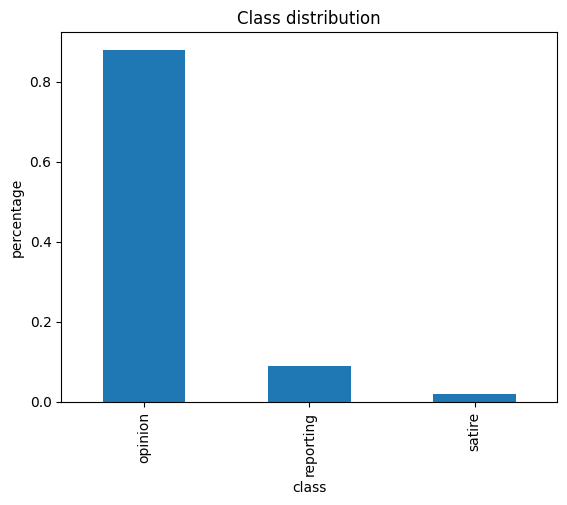

In [35]:
hf.class_distr(class_col="type", df = df_train)

In [36]:
words_per_sample_train = hf.words_per_sample(df_train["text"]) 
words_per_sample_test = hf.words_per_sample(df_test["text"]) 
print(f"\n Median number of words per sample in train set: {words_per_sample_train}")
print(f"\n Median number of words per sample in test set: {words_per_sample_test}")


 Median number of words per sample in train set: 685.0

 Median number of words per sample in test set: 695.0


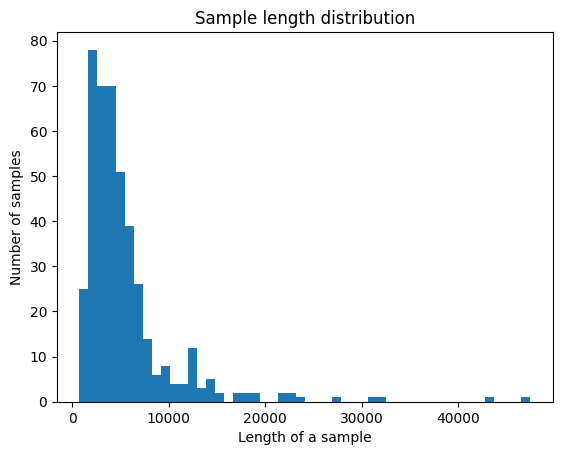

In [37]:
hf.plot_sample_length_distr(df_train["text"])

In [38]:
num_samples_train = df_train.count().values[0]
num_samples_test = df_test.count().values[0]

train_ratio =  num_samples_train/words_per_sample_train
test_ratio = num_samples_test/ words_per_sample_test
print(train_ratio)
print(test_ratio)

0.6321167883211679
0.11942446043165468


#### Process data